In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_spending_data = {
    'CustomerID': list(range(1, 21)), # 20 IDs
    'Age': [25, 30, 35, 28, 40, 50, 22, 33, 45, 29, 38, 55, 60, 20, 31, 27, 42, 36, 48, 23], # 20 ages
    'Annual_Income_k': [50, 60, 75, 55, 80, 120, 48, 70, 90, 62, 85, 150, 200, 45, 68, 58, 88, 72, 95, 52], # 20 incomes
    'Last_Purchase_Amount': [
        50, 65, 72, 58, 80, 110, 55, 70, 95, 60, 88, 130, 150, 52, 78, # 15 "normal" values
        1500, # High outlier 1
        5,    # Low outlier 1
        2500, # High outlier 2
        10,   # Low outlier 2
        500   # Moderate outlier
    ] # Total 20 purchase amounts
}

In [3]:
df_spending = pd.DataFrame(customer_spending_data)

print("Original Customer Spending Data (with potential outliers):")
print(df_spending)
print("\nOriginal Data Info:")
df_spending.info()

Original Customer Spending Data (with potential outliers):
    CustomerID  Age  Annual_Income_k  Last_Purchase_Amount
0            1   25               50                    50
1            2   30               60                    65
2            3   35               75                    72
3            4   28               55                    58
4            5   40               80                    80
5            6   50              120                   110
6            7   22               48                    55
7            8   33               70                    70
8            9   45               90                    95
9           10   29               62                    60
10          11   38               85                    88
11          12   55              150                   130
12          13   60              200                   150
13          14   20               45                    52
14          15   31               68                    

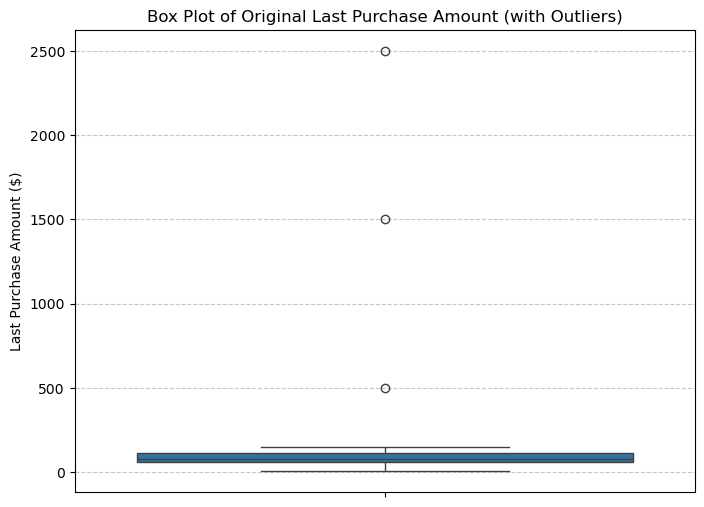

In [4]:

plt.figure(figsize=(8, 6)) 
sns.boxplot(y=df_spending['Last_Purchase_Amount']) 
plt.title('Box Plot of Original Last Purchase Amount (with Outliers)') 
plt.ylabel('Last Purchase Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show() 


In [5]:
Q1 = df_spending['Last_Purchase_Amount'].quantile(0.25)
Q3 = df_spending['Last_Purchase_Amount'].quantile(0.75)
IQR = Q3 - Q1



In [6]:
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")


Q1 (25th percentile): 57.25
Q3 (75th percentile): 115.0
IQR (Q3 - Q1): 57.75


In [7]:
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")

Lower Bound for Outliers: -29.375
Upper Bound for Outliers: 201.625


In [8]:
outliers_iqr = df_spending[(df_spending['Last_Purchase_Amount'] < lower_bound) |
                           (df_spending['Last_Purchase_Amount'] > upper_bound)]

print("\nIdentified Outliers (using IQR method):")
print(outliers_iqr)


Identified Outliers (using IQR method):
    CustomerID  Age  Annual_Income_k  Last_Purchase_Amount
15          16   27               58                  1500
17          18   36               72                  2500
19          20   23               52                   500


In [ ]:
################## Strategy 1 ######################

In [ ]:
df_no_outliers = df_spending[(df_spending['Last_Purchase_Amount'] >= lower_bound) &
                             (df_spending['Last_Purchase_Amount'] <= upper_bound)].copy()

print("\nDataFrame after removing outliers (based on IQR):")
print(df_no_outliers)
print(f"\nOriginal rows: {len(df_spending)},\
       Rows after removing outliers: {len(df_no_outliers)}")
print("\nDescriptive statistics after removing outliers:")
print(df_no_outliers['Last_Purchase_Amount'].describe())


DataFrame after removing outliers (based on IQR):
    CustomerID  Age  Annual_Income_k  Last_Purchase_Amount
0            1   25               50                    50
1            2   30               60                    65
2            3   35               75                    72
3            4   28               55                    58
4            5   40               80                    80
5            6   50              120                   110
6            7   22               48                    55
7            8   33               70                    70
8            9   45               90                    95
9           10   29               62                    60
10          11   38               85                    88
11          12   55              150                   130
12          13   60              200                   150
13          14   20               45                    52
14          15   31               68                    78
16   

In [ ]:
################## Strategy 2 ######################

In [10]:
df_capped_outliers = df_spending.copy() # Work on a copy

In [11]:
df_capped_outliers['Last_Purchase_Amount'] = np.where(
    df_capped_outliers['Last_Purchase_Amount'] > upper_bound,
    upper_bound,
    df_capped_outliers['Last_Purchase_Amount']
)

In [12]:
df_capped_outliers['Last_Purchase_Amount'] = np.where(
    df_capped_outliers['Last_Purchase_Amount'] < lower_bound,
    lower_bound,
    df_capped_outliers['Last_Purchase_Amount']
)

In [13]:
print("\nDataFrame after capping outliers (based on IQR bounds):")
print(df_capped_outliers)
print("\nDescriptive statistics after capping outliers:")
print(df_capped_outliers['Last_Purchase_Amount'].describe())


DataFrame after capping outliers (based on IQR bounds):
    CustomerID  Age  Annual_Income_k  Last_Purchase_Amount
0            1   25               50                50.000
1            2   30               60                65.000
2            3   35               75                72.000
3            4   28               55                58.000
4            5   40               80                80.000
5            6   50              120               110.000
6            7   22               48                55.000
7            8   33               70                70.000
8            9   45               90                95.000
9           10   29               62                60.000
10          11   38               85                88.000
11          12   55              150               130.000
12          13   60              200               150.000
13          14   20               45                52.000
14          15   31               68                78.000

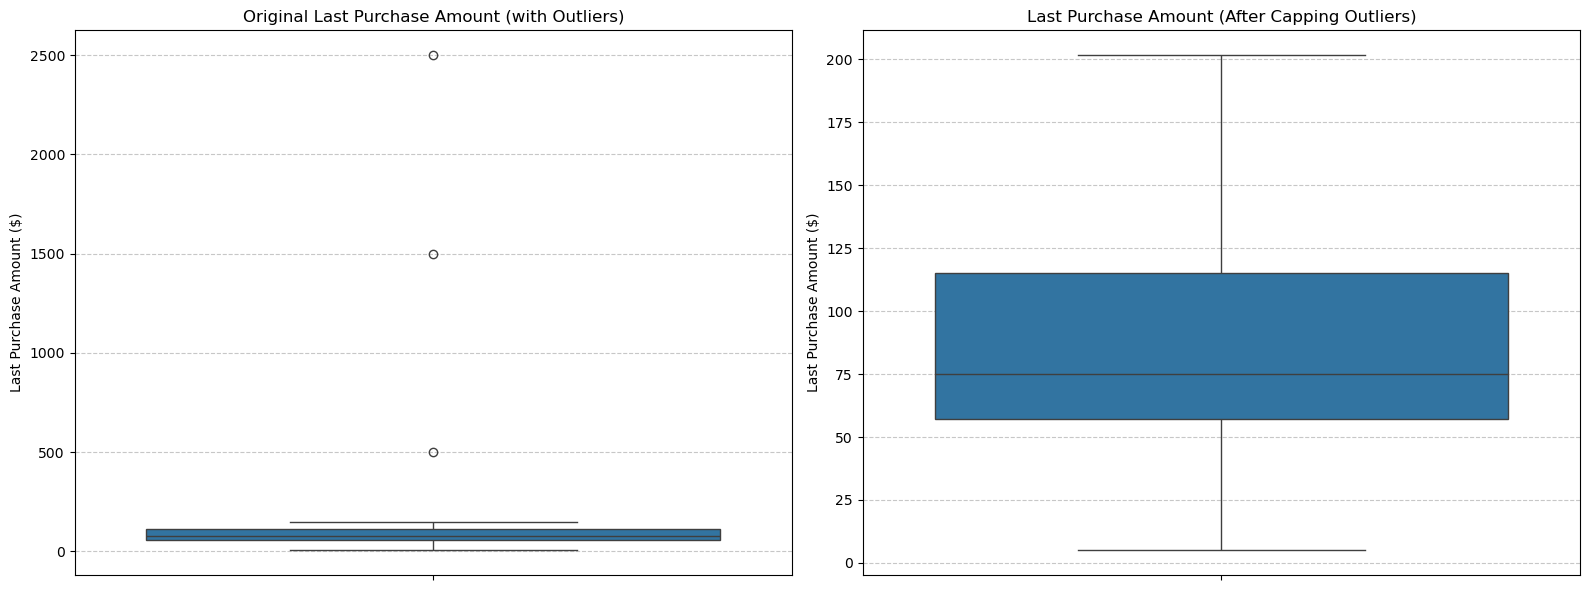

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Original data with outliers (will show compression due to extremes)
sns.boxplot(y=df_spending['Last_Purchase_Amount'], ax=axes[0])
axes[0].set_title('Original Last Purchase Amount (with Outliers)')
axes[0].set_ylabel('Last Purchase Amount ($)')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

#Plot 2: Capped data (or df_no_outliers if you prefer removal)
# - this will show the main distribution clearly

sns.boxplot(y=df_capped_outliers['Last_Purchase_Amount'], ax=axes[1])
axes[1].set_title('Last Purchase Amount (After Capping Outliers)')
axes[1].set_ylabel('Last Purchase Amount ($)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() 
plt.show()